In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('mall_customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


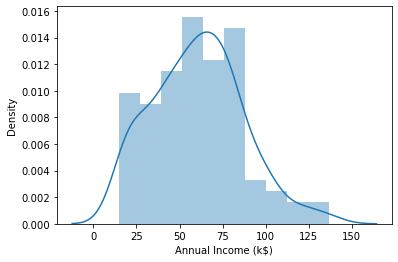

In [6]:
sns.distplot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

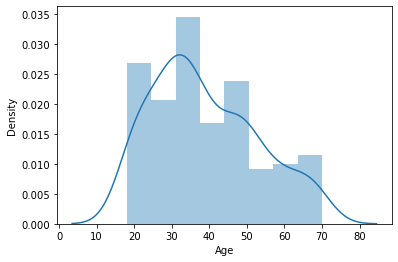

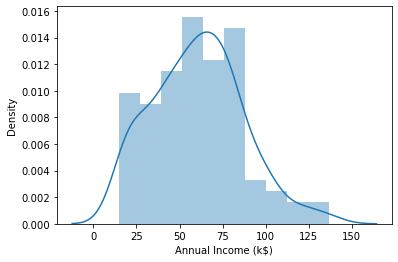

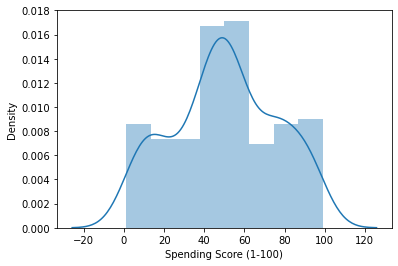

In [8]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

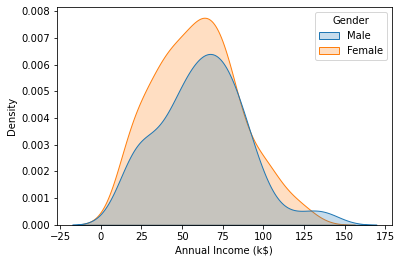

In [19]:
sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender']);

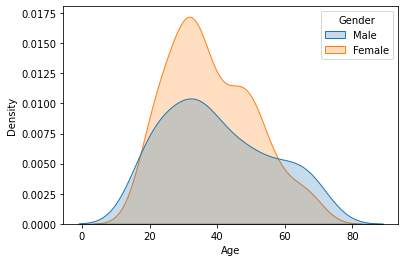

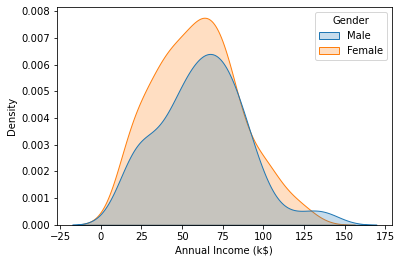

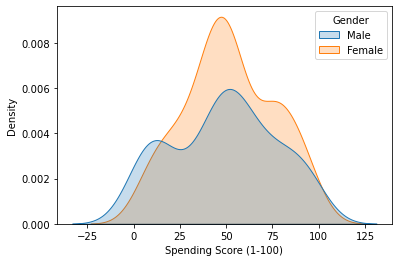

In [20]:
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender']);

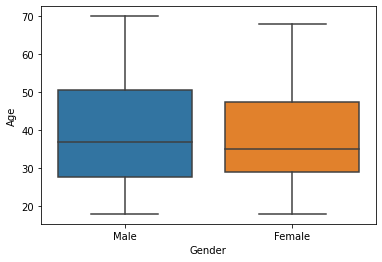

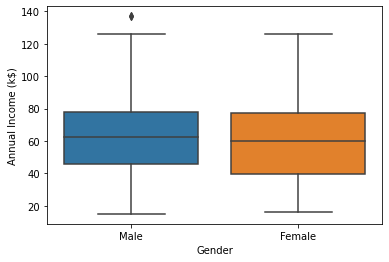

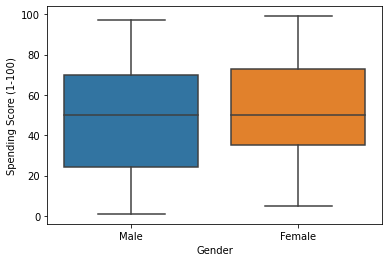

In [23]:
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i]);

In [26]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

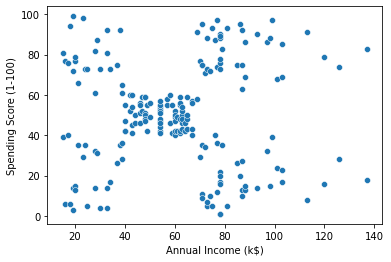

In [28]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)');

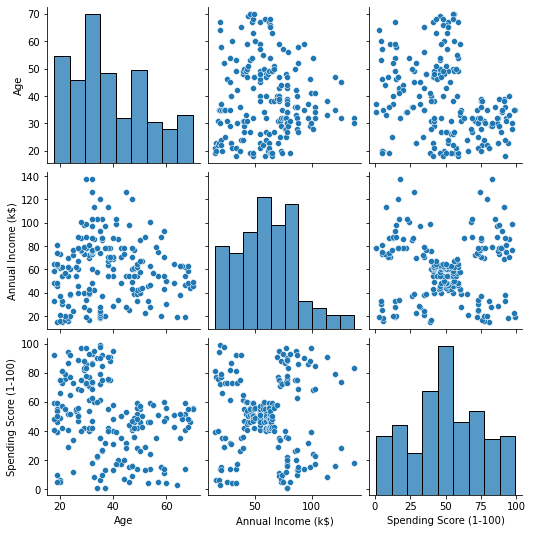

In [30]:
df = df.drop('CustomerID',axis=1)
sns.pairplot(data=df);

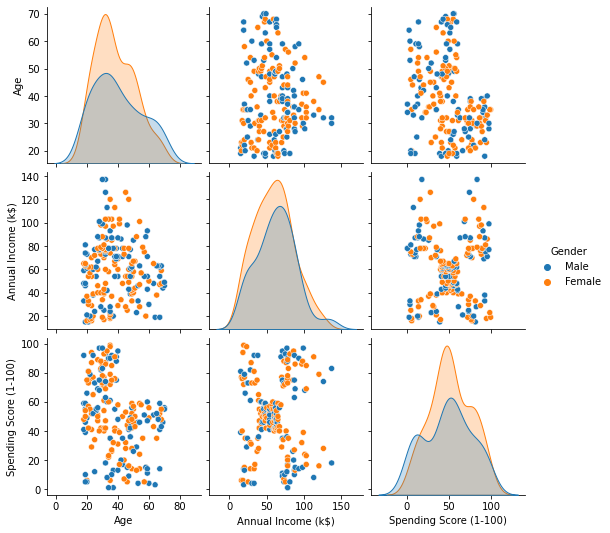

In [34]:
sns.pairplot(df,hue='Gender');

In [31]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [35]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


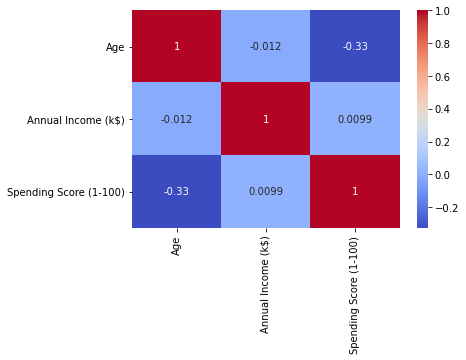

In [37]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');

# Clustering method

In [48]:
# Univariate cluster
cluster_1 = KMeans(n_clusters=5)

In [49]:
cluster_1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=5)

In [50]:
cluster_1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [51]:
df['Income Cluster'] = cluster_1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,3
3,Female,23,16,77,3
4,Female,31,17,40,3


In [52]:
df['Income Cluster'].value_counts()

0    56
4    50
1    42
3    32
2    20
Name: Income Cluster, dtype: int64

In [53]:
cluster_1.inertia_

8481.49619047619

In [55]:
inertia_scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [56]:
inertia_scores

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5081.484660267269,
 3949.275613275612,
 2831.296031746034,
 2217.640620490622,
 1736.5656510156507]

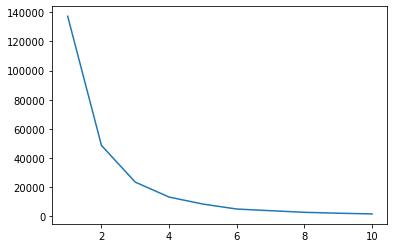

In [58]:
# Elbow method
plt.plot(range(1,11),inertia_scores);

In [59]:
# Use n_clusters = 3 
cluster_1 = KMeans(n_clusters=3)
cluster_1.fit(df[['Annual Income (k$)']])
cluster_1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [60]:
df['Income Cluster'] = cluster_1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [61]:
df['Income Cluster'].value_counts()

1    90
0    74
2    36
Name: Income Cluster, dtype: int64

In [62]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


In [63]:
# Bivariate clustering
cluster_2 = KMeans(n_clusters=3)
cluster_2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
cluster_2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [70]:
cluster_2.inertia_

44448.45544793369

In [66]:
df['Spending Score & Income Cluster'] = cluster_2.labels_
df.head(-1)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score & Income Cluster
0,Male,19,15,39,0,0
1,Male,21,15,81,0,0
2,Female,20,16,6,0,0
3,Female,23,16,77,0,0
4,Female,31,17,40,0,0
...,...,...,...,...,...,...
194,Female,47,120,16,2,2
195,Female,35,120,79,2,1
196,Female,45,126,28,2,2
197,Male,32,126,74,2,1


In [67]:
inertia_scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores.append(kmeans.inertia_)

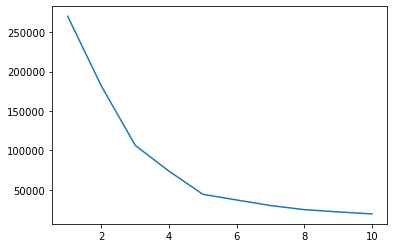

In [68]:
plt.plot(range(1,11),inertia_scores);

In [69]:
# Use n_cluster = 5
cluster_2 = KMeans(n_clusters=5)
cluster_2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
cluster_2.labels_

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [71]:
df['Spending Score & Income Cluster'] = cluster_2.labels_

In [72]:
df.head(-1)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score & Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,1
2,Female,20,16,6,0,4
3,Female,23,16,77,0,1
4,Female,31,17,40,0,4
...,...,...,...,...,...,...
194,Female,47,120,16,2,3
195,Female,35,120,79,2,2
196,Female,45,126,28,2,3
197,Male,32,126,74,2,2


In [73]:
df['Spending Score & Income Cluster'].value_counts()

0    81
2    39
3    35
4    23
1    22
Name: Spending Score & Income Cluster, dtype: int64

In [81]:
centers = pd.DataFrame(cluster_2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,55.296296,49.518519
1,25.727273,79.363636
2,86.538462,82.128205
3,88.200000,17.114286
4,26.304348,20.913043


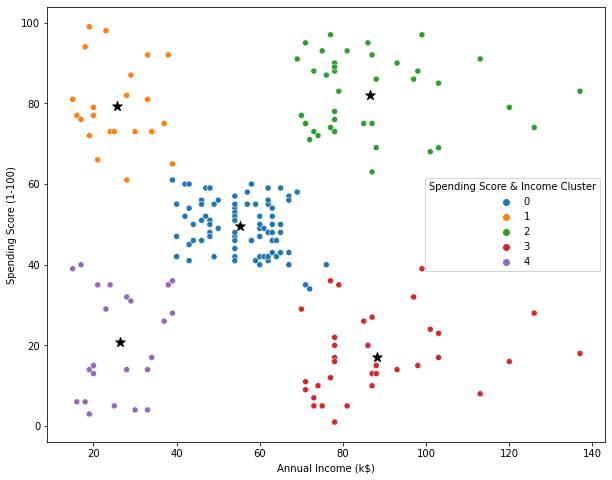

In [84]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',
                hue='Spending Score & Income Cluster',
               palette='tab10');
# plt.savefig('bivariate_clustering.jpg')

In [87]:
pd.crosstab(df['Spending Score & Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending Score & Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [88]:
df.groupby('Spending Score & Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending Score & Income Cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


## Multivariate cluster

In [89]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [91]:
new_df = pd.get_dummies(df,drop_first=True)
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score & Income Cluster,Gender_Male
0,19,15,39,0,4,1
1,21,15,81,0,1,1
2,20,16,6,0,4,0
3,23,16,77,0,1,0
4,31,17,40,0,4,0


In [92]:
new_df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending Score & Income Cluster', 'Gender_Male'],
      dtype='object')

In [93]:
new_df = new_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

In [94]:
new_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [97]:
scaled_df = pd.DataFrame(scale.fit_transform(new_df))

In [99]:
scaled_df.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [100]:
inertia_scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    inertia_scores.append(kmeans.inertia_)

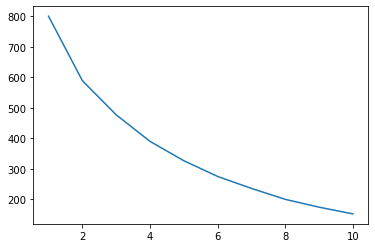

In [101]:
plt.plot(range(1,11),inertia_scores);

In [102]:
# n_clusters = 4
cluster_3 = KMeans(n_clusters=4)
cluster_3.fit(scaled_df)
cluster_3.labels_

array([2, 2, 3, 0, 0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 2, 3, 2, 1, 0, 1, 2,
       3, 2, 3, 2, 3, 2, 3, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 0, 3, 2, 1, 0,
       3, 0, 3, 0, 0, 0, 3, 2, 0, 1, 3, 1, 3, 1, 0, 1, 1, 2, 3, 3, 1, 2,
       3, 3, 2, 0, 1, 3, 3, 3, 1, 2, 3, 1, 0, 3, 1, 2, 1, 3, 0, 1, 3, 0,
       0, 3, 3, 2, 1, 3, 0, 2, 3, 0, 1, 2, 0, 3, 1, 2, 1, 0, 3, 1, 1, 1,
       1, 0, 3, 2, 0, 0, 3, 3, 3, 3, 2, 3, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       0, 0, 1, 0, 3, 2, 1, 0, 3, 2, 0, 0, 1, 2, 1, 0, 3, 2, 1, 2, 3, 0,
       3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 3, 0,
       1, 2, 1, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 0, 3, 0, 1, 0, 3, 0, 3, 2,
       1, 2])

In [111]:
df['Multivariate Cluster'] = cluster_3.labels_

In [112]:
scaled_df['Clusters'] = cluster_3.labels_

In [113]:
scaled_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Clusters
0,-1.424569,-1.738999,-0.434801,1.128152,2
1,-1.281035,-1.738999,1.195704,1.128152,2
2,-1.352802,-1.700830,-1.715913,-0.886405,3
3,-1.137502,-1.700830,1.040418,-0.886405,0
4,-0.563369,-1.662660,-0.395980,-0.886405,0
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405,0
196,0.441365,2.497807,-0.861839,-0.886405,3
197,-0.491602,2.497807,0.923953,1.128152,2
198,-0.491602,2.917671,-1.250054,1.128152,1


In [114]:
scaled_df['Clusters'].value_counts()

0    57
3    55
1    48
2    40
Name: Clusters, dtype: int64

In [116]:
centers = pd.DataFrame(cluster_3.cluster_centers_)
# centers.columns = ['x','y']
centers

,0,1,2,3
0,-0.747192,-0.034098,0.678764,-0.886405
1,0.759830,0.070868,-0.814929,1.128152
2,-0.760727,0.054964,0.833693,1.128152
3,0.664494,-0.066484,-0.598558,-0.886405


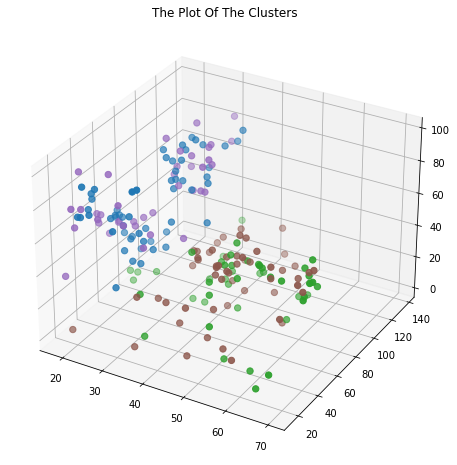

In [125]:
# display our clusters distribution in 3-D plot
import matplotlib.cm as cmap
from matplotlib import colors
cmap = colors.ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(df["Age"],df["Annual Income (k$)"],df["Spending Score (1-100)"], 
           s=40, c=df["Multivariate Cluster"], marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
# plot this data to have a look at the clustering of customers:
PLOT = go.Figure()
for C in list(data.Cluster.unique()):


    PLOT.add_trace(go.Scatter3d(x = data[data.Cluster == C]['Income'],
                                y = data[data.Cluster == C]['Seniority'],
                                z = data[data.Cluster == C]['Spending'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))